##  <b> Word Cloud and Word2Vec - NLTK
   
> From Leaf by Niggle - JRR Tolkien 

### <b> Setup 

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # Stemming 
from gensim.models import Word2Vec

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from src import PlotTSNE
import warnings

### <b> Data Loading


In [2]:
# Save the path file
folder = '../datasets/niggle/niggle.txt'
file = open(folder, 'r') 
poem = file.read()

### <b> Data Processing


##### <b> Split data into words

In [3]:
tokens = word_tokenize(poem)
print(tokens[0:10])

['There', 'was', 'once', 'a', 'little', 'man', 'called', 'Niggle', ',', 'who']


##### <b> Removing the stopwords

In [4]:
stop_words = stopwords.words('english') # unique words
tokens = [w for w in tokens if not w in stop_words]
print(tokens[0:10])

['There', 'little', 'man', 'called', 'Niggle', ',', 'long', 'journey', 'make', '.']


##### <b> Removing the punctuation

In [5]:
tokens = [word.lower() for word in tokens if word.isalpha()]
print(tokens[0:10])

['there', 'little', 'man', 'called', 'niggle', 'long', 'journey', 'make', 'he', 'want']


##### <b> Inspect frequency words from our Text

In [6]:
vocabulary = set(tokens) # unique values
print(len(vocabulary))
frequency = nltk.FreqDist(tokens)
frequency

1251


FreqDist({'niggle': 105, 'i': 97, 'said': 83, 'he': 77, 'parish': 49, 'could': 40, 'time': 33, 'the': 33, 'it': 30, 'but': 28, ...})

## <b> Word Cloud

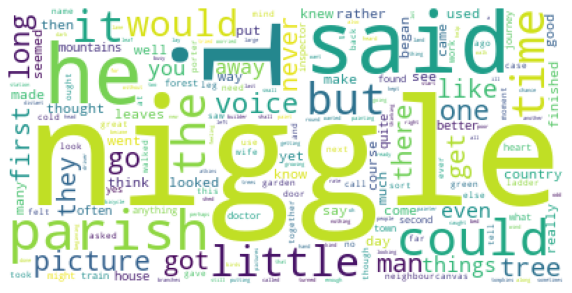

In [7]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(frequency)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## <b> Word2Vec

##### <b> Create our vocabulary

In [8]:
# convert lines to a single blob of text
vocab = '\n'.join(tokens)
# open file
file = open("../datasets/niggle/vocabulary.txt", 'w')
# write text
file.write(vocab)
# close file
file.close()

In [9]:
import codecs

# Load corpus to Python
with codecs.open('../datasets/niggle/vocabulary.txt', encoding = 'utf8') as fp:
    corpus = fp.read()

In [10]:
# Tokenization with NLTK 
sentences = [[w.lower() for w in word_tokenize(sentence, language = 'english')] for sentence in sent_tokenize(corpus, language = 'english')]

In [11]:
# Training the model
model = Word2Vec(sentences, size = 100, window = 5, min_count = 5, workers = 8)
model.init_sims(replace = True)

In [12]:
# Probabilityes of a word appers around niggle
model.wv.most_similar('niggle')

[('he', 0.8934425115585327),
 ('i', 0.8582231998443604),
 ('said', 0.8318978548049927),
 ('parish', 0.8089346289634705),
 ('one', 0.8083889484405518),
 ('go', 0.7928768396377563),
 ('away', 0.7926561832427979),
 ('could', 0.7784641981124878),
 ('the', 0.7710608839988708),
 ('they', 0.7587361335754395)]

In [13]:
model.save('models/word2vec.model')

In [14]:
# load to prevent processing again
model = Word2Vec.load("models/word2vec.model")

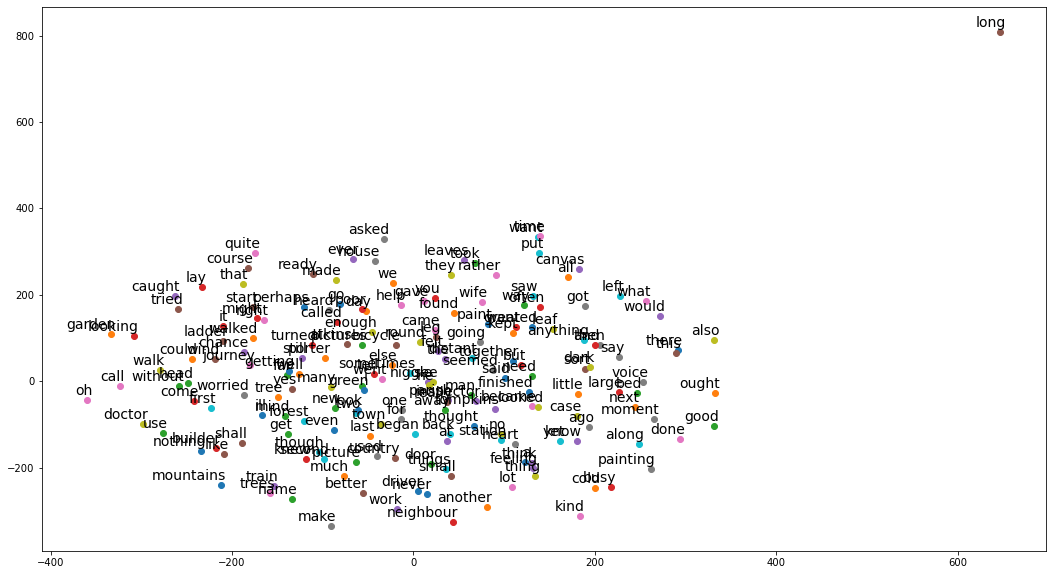

In [15]:
viz = PlotTSNE.PlotTSNE(model, perplexity=35, components=3, iterations=2000)
viz.plot_tsne()